# LeNet5

- [GradientBased Learning Applied to Document Recognition](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

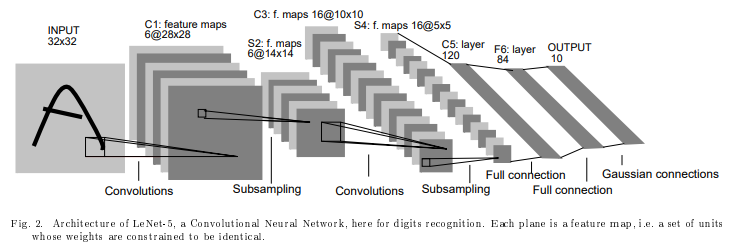

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
 
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

In [78]:
torch.cuda.is_available()

False

In [76]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [31]:
# transform을 이용하여 이미지를 텐서로 변환할 수 있음
transform = transforms.Compose([
    transforms.ToTensor()
])
train_set = MNIST(root='.data', train=True, download=True, transform=transform)
test_set = MNIST(root='.data', train=False, download=True, transform=transform)

In [40]:
# MNIST 데이터셋의 경우 28x28 의 크기인데 모델의 설명에는 32x32 input을 받는다고 되어있다
# 이유: 2의 제곱 형태로 리사이즈해서 2 stride를 쉽게 사용하기 위해서
# 출처: https://github.com/torch/tutorials/issues/48
train_set[0][0].shape

torch.Size([1, 28, 28])

In [49]:
transform = transforms.Compose([
    transforms.Resize([32, 32]), # 리사이징 해주는 작업 추가
    transforms.ToTensor()
])
train_set = MNIST(root='.data', train=True, download=True, transform=transform)
test_set = MNIST(root='.data', train=False, download=True, transform=transform)

In [50]:
train_set[0][0].shape

torch.Size([1, 32, 32])

# DataLoader 정의

In [51]:
BATCH_SIZE = 64

In [52]:
train_dataloader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

# Model 정의

In [85]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.s2 = nn.AvgPool2d(kernel_size=2)
        self.c3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.s4 = nn.AvgPool2d(kernel_size=2)
        self.c5 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)
        self.f6 = nn.Linear(120, 84)
        self.f7 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.c1(x)
        x = self.s2(x)
        x = self.c3(x)
        x = self.s4(x)
        x = self.c5(x)
        x = self.f6(x)
        x = self.f7(x)
        return x

In [86]:
model = LeNet5().to(device)

In [87]:
model

LeNet5(
  (c1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (s2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (c3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (s4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (c5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (f6): Linear(in_features=120, out_features=84, bias=True)
  (f7): Linear(in_features=84, out_features=10, bias=True)
)